In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
splits_root = r"E:\Skripsi\DEC\dataset\ae-supervised-dataset\splits"
train_csv = os.path.join(splits_root, "train_latent.csv")
test_csv  = os.path.join(splits_root, "test_latent.csv")


train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)

In [3]:
y_train = train_df["label"].values
y_test  = test_df["label"].values

X_train = train_df.drop(columns=["filename","label"]).values
X_test  = test_df.drop(columns=["filename","label"]).values

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

Improvement pada Weight tiap kelas, akurasi berkurang dari 74 - 72

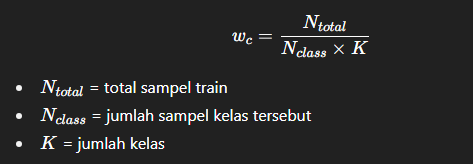

In [ ]:
# class_counts = np.bincount(y_train_enc)
# n_total = len(y_train_enc)
# n_classes = len(class_counts)

# # Bobot kelas
# class_weights = {i: n_total / (count * n_classes) for i, count in enumerate(class_counts)}
# print("Class Weights:", class_weights)

# # Buat sample_weight sesuai label
# sample_weights = np.array([class_weights[label] for label in y_train_enc])


Class Weights: {0: np.float64(3.1518367346938776), 1: np.float64(0.782370820668693), 2: np.float64(0.45964285714285713), 3: np.float64(0.9010501750291715), 4: np.float64(8.393478260869566)}


In [4]:
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="gpu_hist",   
    eval_metric="mlogloss"
)

model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_test, y_test_enc)],
          verbose=True)

[0]	validation_0-mlogloss:1.53449	validation_1-mlogloss:1.53891
[1]	validation_0-mlogloss:1.46834	validation_1-mlogloss:1.47763


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\training.py:183: UserWarning: [14:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[2]	validation_0-mlogloss:1.40642	validation_1-mlogloss:1.42056
[3]	validation_0-mlogloss:1.35065	validation_1-mlogloss:1.37009
[4]	validation_0-mlogloss:1.29748	validation_1-mlogloss:1.32291
[5]	validation_0-mlogloss:1.24923	validation_1-mlogloss:1.28005
[6]	validation_0-mlogloss:1.20386	validation_1-mlogloss:1.23946
[7]	validation_0-mlogloss:1.16142	validation_1-mlogloss:1.20176
[8]	validation_0-mlogloss:1.12179	validation_1-mlogloss:1.16646
[9]	validation_0-mlogloss:1.08490	validation_1-mlogloss:1.13429
[10]	validation_0-mlogloss:1.05017	validation_1-mlogloss:1.10424
[11]	validation_0-mlogloss:1.01745	validation_1-mlogloss:1.07594
[12]	validation_0-mlogloss:0.98700	validation_1-mlogloss:1.04825
[13]	validation_0-mlogloss:0.95856	validation_1-mlogloss:1.02464
[14]	validation_0-mlogloss:0.93118	validation_1-mlogloss:1.00024
[15]	validation_0-mlogloss:0.90540	validation_1-mlogloss:0.97846
[16]	validation_0-mlogloss:0.88077	validation_1-mlogloss:0.95711
[17]	validation_0-mlogloss:0.8574

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\core.py:2676: UserWarning: [14:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
e:\Skripsi\DEC\envTA\lib\site-packages\xgboost\core.py:729: UserWarning: [14:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



Classification Report:
              precision    recall  f1-score   support

    GASBURST       0.29      0.03      0.06        61
          MP       0.64      0.74      0.69       247
    ROCKFALL       0.95      0.95      0.95       421
         VTA       0.67      0.72      0.69       214
         VTB       1.00      0.70      0.82        23

    accuracy                           0.78       966
   macro avg       0.71      0.63      0.64       966
weighted avg       0.77      0.78      0.77       966



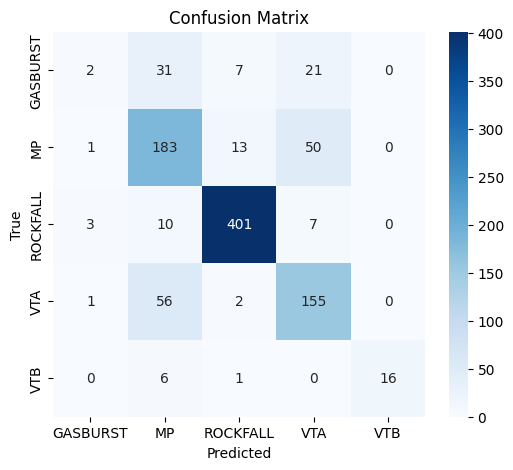

In [5]:
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Penyebab utama

Imbalanced dataset

Kelas minor (misalnya GASBURST) jumlahnya sangat kecil dibanding ROCKFALL atau MP.

XGBoost (seperti model ML lain) akan cenderung “mengabaikan” kelas minor karena tidak mengurangi loss secara signifikan.

Feature overlap

Latent space hasil autoencoder tidak memisahkan GASBURST dengan baik.

Bisa jadi sinyal GASBURST mirip dengan MP/VT, sehingga cluster-nya tidak jelas.

Overfitting pada kelas dominan

Model fokus ke kelas besar (misalnya ROCKFALL) karena jauh lebih sering muncul.

Akibatnya F1 untuk minor classes = 0.